In [1]:
# Loading package

import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from parameters import *

### Load data

In [2]:
train= pd.read_csv(open_csvfile('data\\train.csv'))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# split Cabine into 'Deck' and 'Room'
train['Deck'] = train.Cabin.str[:1]
train['Room'] = train.Cabin.str[1:]
del train['Cabin']

# Define dictionary for the location of embark
dict1 = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}

train.Embarked = train.Embarked.map(dict1)

In [8]:
train.Survived.replace({0: 'No', 1: 'Yes'}, inplace = True)

## Data cleaning

In [137]:
train.Deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [139]:
#incorrect data - Deck T doesn't exist - exclude value from df
train = train.loc[(train['Deck']) != 'T']

## Plotting data

AxesSubplot(0.125,0.11;0.775x0.77)


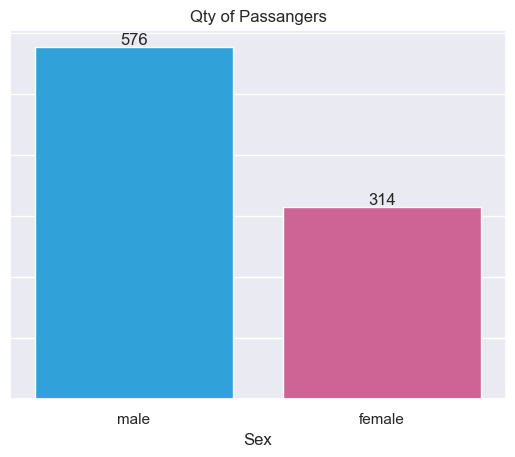

In [140]:
# Plotting quantity male/female
sns.set_theme(style = 'dark')
sns.set(font_scale = 1)

ax = sns.countplot(data= train, x = 'Sex', palette = ["#14AAF5", "#E05194"])
ax.bar_label(ax.containers[0])
plt.title('Qty of Passangers')
ax.set(ylabel = None)
ax.axes.yaxis.set_ticklabels([])

print(ax)

AxesSubplot(0.125,0.11;0.775x0.77)


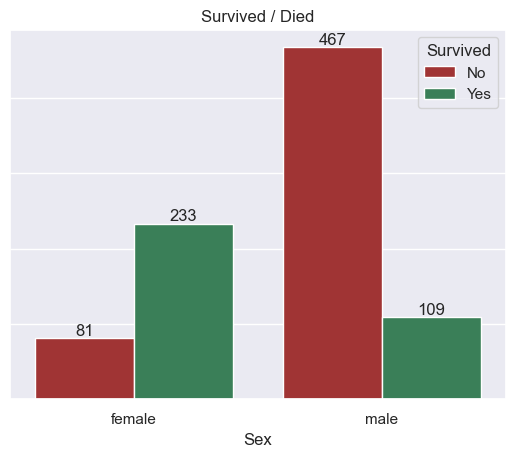

In [141]:
# Plotting quantity male/female and died/survived

sex_surv = pd.DataFrame(train.groupby(['Sex', 'Survived'], as_index = False)['PassengerId'].count()) #create df with information for plot

sns.set_theme(style = 'dark')
sns.set(font_scale = 1)

ax = sns.barplot(data= sex_surv, x = 'Sex', y = 'PassengerId', hue = 'Survived', palette = ["firebrick", "seagreen"])
plt.title('Survived / Died')
ax.set(ylabel = None)
ax.axes.yaxis.set_ticklabels([])
for container in ax.containers:
    ax.bar_label(container)

print(ax)

AxesSubplot(0.125,0.11;0.775x0.77)


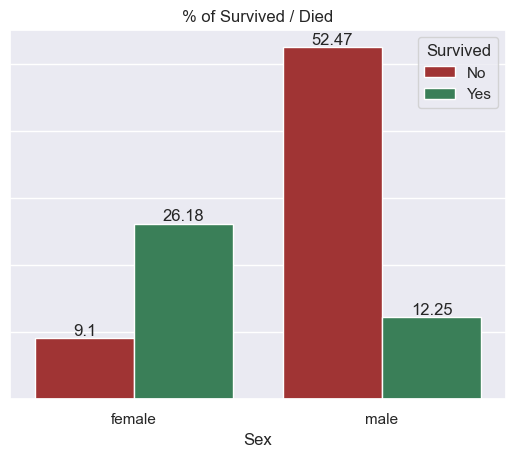

In [142]:
#Plotting percentage
sex_surv['Percentage'] = round(sex_surv['PassengerId'] / sex_surv['PassengerId'].sum() * 100, 2)


sns.set_theme(style = 'dark')
sns.set(font_scale = 1)

ax = sns.barplot(data= sex_surv, x = 'Sex', y = 'Percentage', hue = 'Survived', palette = ["firebrick", "seagreen"])
plt.title('% of Survived / Died')
ax.set(ylabel = None)
ax.axes.yaxis.set_ticklabels([])
for container in ax.containers:
    ax.bar_label(container)

print(ax)

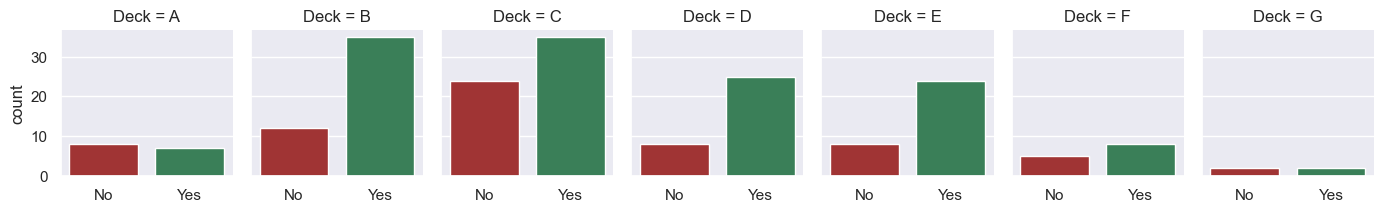

In [176]:
#Check by Deck
sns.set_theme(style = 'dark')
sns.set(font_scale = 1)

ax = sns.catplot(x="Survived",col="Deck", col_wrap=7,
                data = train.sort_values(['Deck']),
                kind="count", height=2.5, aspect=.8, palette = ["firebrick", "seagreen"])

ax.set(xlabel = None)


In [245]:
class_age = pd.DataFrame(train.groupby(['Survived', 'Age', 'Pclass'], as_index = False)['PassengerId'].count())
class_age_survived = class_age.loc[(class_age['Survived']) == 'Yes']

class_age_survived.drop(columns = ['Survived'], inplace = True)

C:\Users\danie\AppData\Local\Temp\ipykernel_18028\1083775617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_age_survived.drop(columns = ['Survived'], inplace = True)
